In [124]:
import pandas as pd
import numpy as np
import functools
import itertools
import datetime
from io import StringIO

In [3]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe.loc[dataframe.AAA >= 5, "BBB"] = -1

dataframe

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [4]:
dataframe.loc[dataframe.AAA >= 5, ["BBB", "CCC"]] = 555

dataframe

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [6]:
dataframe.loc[dataframe.AAA < 5, ["BBB", "CCC"]] = 2000

dataframe

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [7]:
dataframe_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

dataframe.where(dataframe_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [8]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

In [10]:
dataframe["logic"] = np.where(dataframe["AAA"] > 5, "high", "low")

dataframe

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


In [14]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

dataframe[dataframe.AAA <= 5]


,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [15]:

dataframe[dataframe.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


In [16]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [17]:
dataframe.loc[(dataframe["BBB"] < 25) & (dataframe["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [18]:
dataframe.loc[(dataframe["BBB"] > 25) | (dataframe["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [20]:
dataframe.loc[(dataframe["BBB"] > 25) | (dataframe["CCC"] >= 75), "AAA"] = 999
dataframe

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [22]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

aValue = 43.0

dataframe.loc[(dataframe.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [26]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

Crit1 = dataframe.AAA <= 5.5

Crit2 = dataframe.BBB == 10.0

Crit3 = dataframe.CCC > -40.0

AllCrit = Crit1 & Crit2 & Crit3

AllCrit

0     True
1    False
2    False
3    False
dtype: bool

In [28]:
CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

dataframe[AllCrit]

,AAA,BBB,CCC
0,4,10,100


In [31]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe

dataframe[(dataframe.AAA <= 6) & (dataframe.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [35]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

dataframe.loc["bar":"kar"]



,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [36]:
dataframe[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [37]:
dataframe["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [38]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
dataframe_2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])
dataframe_2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [40]:
dataframe_2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [42]:
dataframe = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

dataframe[~((dataframe.AAA <= 6) & (dataframe.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


In [45]:
dataframe = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

source_cols = dataframe.columns

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

dataframe[new_cols] = dataframe[source_cols].map(categories.get)

dataframe

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [47]:
dataframe = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

dataframe.loc[dataframe.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [48]:
dataframe.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


In [51]:
dataframe = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

dataframe = dataframe.set_index("row")

dataframe.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in dataframe.columns])

dataframe = dataframe.stack(0, future_stack=True).reset_index(1)

dataframe.columns = ["Sample", "All_X", "All_Y"]

dataframe

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [53]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

dataframe = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)

dataframe = dataframe.div(dataframe["C"], level=1)

dataframe

A                   B              C     
          O         I         O         I    O    I
n  3.130555 -2.637284  1.069138 -4.048959  1.0  1.0
m -0.306044  5.906879 -1.041909  4.352075  1.0  1.0

In [55]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

dataframe = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

dataframe

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [56]:
dataframe.xs("BB", level=0, axis=0)


,MyData
one,33
two,44
six,55


In [59]:
index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

dataframe = pd.DataFrame(data, indx, cols)

dataframe

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [60]:
All = slice(None)

dataframe.loc["Violet"]

dataframe.loc[(All, "Math"), All]

dataframe.loc[(slice("Ada", "Quinn"), "Math"), All]

dataframe.loc[(All, "Math"), ("Exams")]

dataframe.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


In [61]:
dataframe.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [64]:
dataframe = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

dataframe.loc[dataframe.index[3], "A"] = np.nan

dataframe.bfill()

,A
2013-08-01,0.591504
2013-08-02,-1.789305
2013-08-05,-0.283581
2013-08-06,-1.224995
2013-08-07,-1.224995
2013-08-08,0.381449


In [66]:
dataframe = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

dataframe.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()], include_groups=False)

animal
cat     L
dog     M
fish    M
dtype: object

In [67]:
gb = dataframe.groupby("animal")
gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [68]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

expected_dataframe = gb.apply(GrowUp, include_groups=False)

expected_dataframe

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [69]:
series = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):
    return x * (1 + y)

def red(x):
    return functools.reduce(cum_ret, x, 1.0)

series.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [70]:
dataframe = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

gb = dataframe.groupby("A")

def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())

gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [72]:
dataframe = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

code_groups = dataframe.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")

sorted_dataframe = dataframe.loc[agg_n_sort_order.index]

sorted_dataframe

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [73]:
range_date = pd.date_range(start="2014-10-07", periods=10, freq="2min")

time_series = pd.Series(data=list(range(10)), index=range_date)

def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT

mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

time_series.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [75]:
dataframe = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

dataframe["Counts"] = dataframe.groupby(["Color"]).transform(len)

dataframe

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [77]:
dataframe = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

dataframe["beyer_shifted"] = dataframe.groupby(level=0)["beyer"].shift(1)

dataframe

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [79]:
dataframe = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])

mask = dataframe.groupby(level=0).agg("idxmax")

dataframe_count = dataframe.loc[mask["no"]].reset_index()

dataframe_count


,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [80]:
dataframe = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

dataframe["A"].groupby((dataframe["A"] != dataframe["A"].shift()).cumsum()).groups


{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [81]:
dataframe["A"].groupby((dataframe["A"] != dataframe["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [83]:
dataframe = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

dataframes = list(
    zip(
        *dataframe.groupby(
            (1 * (dataframe["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

dataframes[0]

,Case,Data
0,A,1.273239
1,A,-1.722163
2,A,0.433859
3,B,0.212730


In [84]:
dataframes[1]

,Case,Data
4,A,2.487908
5,A,0.187440
6,B,0.143542


In [85]:
dataframes[2]

,Case,Data
7,A,-0.646735
8,A,-1.665134


In [86]:
dataframe = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

table = pd.pivot_table(
    dataframe,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

table.stack("City", future_stack=True)

Sales
Province City            
AL       Calgary      8.0
         Edmonton     4.0
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All         12.0
BC       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver   16.0
         Windsor      NaN
         Winnipeg     NaN
         All         16.0
MN       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     3.0
         All          3.0
ON       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto     13.0
         Vancouver    NaN
         Windsor      1.0
         Winnipeg     NaN
         All         14.0
QC       Calgary      NaN
         Edmonton     NaN
         Montreal     6.0
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All          6.0
All      Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0
         All         51.0

In [87]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

dataframe = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)


dataframe.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [88]:
dataframe = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="ME", periods=36),
)


pd.pivot_table(
    dataframe, index=dataframe.index.month, columns=dataframe.index.year, values="value", aggfunc="sum"
)

,2011,2012,2013
1,1.285714,1.220417,-0.052307
2,1.666148,-1.387907,-1.003267
3,-0.238855,-0.496037,0.864788
4,-1.458664,1.854912,1.547074
5,-0.966186,-0.298926,0.473970
6,-1.153465,-1.095542,-0.272890
7,-0.468578,0.319791,-1.525313
8,-0.509416,0.596965,-0.157235
9,0.644853,-1.279626,-0.832770
10,-0.188774,-0.565389,-0.986508


In [89]:
dataframe = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

def SeriesFromSubList(aList):
    return pd.Series(aList)

dataframe_orgnization = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in dataframe.iterrows()}
)

dataframe_orgnization

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [90]:
dataframe = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

dataframe

,A,B
2001-01-01,0.000004,-0.000140
2001-01-02,0.000003,0.000023
2001-01-03,0.000071,-0.000146
2001-01-04,0.000026,0.000082
2001-01-05,0.000011,-0.000100
...,...,...
2006-06-19,0.000109,0.000051
2006-06-20,0.000163,0.000032
2006-06-21,-0.000169,0.000046
2006-06-22,0.000037,0.000027


In [91]:
def gm(df, const):
    v = ((((dataframe["A"] + dataframe["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]


series = pd.Series(
    {
        dataframe.index[i]: gm(dataframe.iloc[i: min(i + 51, len(dataframe) - 1)], 5)
        for i in range(len(dataframe) - 50)
    }
)

series

2001-01-01   -0.055237
2001-01-02   -0.055237
2001-01-03   -0.055237
2001-01-04   -0.055237
2001-01-05   -0.055237
                ...   
2006-04-30   -0.055237
2006-05-01   -0.055237
2006-05-02   -0.055237
2006-05-03   -0.055237
2006-05-04   -0.055237
Length: 1950, dtype: float64

In [92]:
range_date = pd.date_range(start="2014-01-01", periods=100)

dataframe = pd.DataFrame(
    {
        "Open": np.random.randn(len(range_date)),
        "Close": np.random.randn(len(range_date)),
        "Volume": np.random.randint(100, 2000, len(range_date)),
    },
    index=range_date,
)

dataframe

,Open,Close,Volume
2014-01-01,0.659197,-1.684845,1786
2014-01-02,0.048576,-0.733089,1262
2014-01-03,0.382439,1.422345,292
2014-01-04,0.204275,-0.663801,337
2014-01-05,1.795871,-0.635875,1382
...,...,...,...
2014-04-06,-1.551668,-1.300204,170
2014-04-07,-0.317098,0.202920,1789
2014-04-08,-0.445990,1.247914,1180
2014-04-09,-0.119355,1.880280,549


In [93]:
dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [95]:
range_dates = pd.date_range("2000-01-01", periods=6)

dataframe_1 = pd.DataFrame(np.random.randn(6, 3), index=range_dates, columns=["A", "B", "C"])

dataframe_2 = dataframe_1.copy()

In [96]:
dataframe = pd.concat([dataframe_1, dataframe_2], ignore_index=True)

dataframe

,A,B,C
0,-0.246768,-0.229602,1.606553
1,0.018731,-1.235816,-1.521398
2,-1.293329,-1.204341,0.765651
3,-0.475189,0.953904,1.246513
4,0.105307,-1.335797,-0.560723
5,0.762984,-0.604299,-0.974085
6,-0.246768,-0.229602,1.606553
7,0.018731,-1.235816,-1.521398
8,-1.293329,-1.204341,0.765651
9,-0.475189,0.953904,1.246513


In [97]:
dataframe = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

dataframe["Test_1"] = dataframe["Test_0"] - 1

pd.merge(
    dataframe,
    dataframe,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,-0.058358,-1,1,0.400839,0
1,A,160,0,-0.309773,-1,1,2.414008,0
2,A,160,1,2.414008,0,2,0.578948,1
3,C,40,0,-1.094292,-1,1,-1.178852,0


<Axes: title={'center': 'price'}, xlabel='quartiles'>

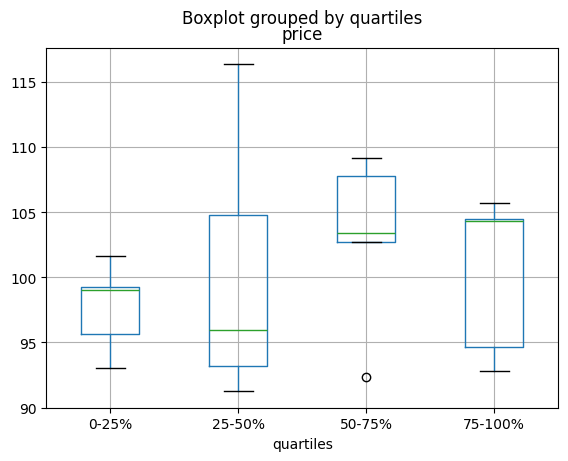

In [98]:
dataframe = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


dataframe["quartiles"] = pd.qcut(
    dataframe["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)


dataframe.boxplot(column="price", by="quartiles")

In [99]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))


files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [101]:
i = pd.date_range("20000101", periods=10000)

dataframe = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

dataframe.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [110]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [113]:


pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [114]:
pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [116]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [122]:
dataframe = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = dataframe.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.059419,NaN,NaN,NaN,NaN
2,0.091979,-0.111751,NaN,NaN,NaN
3,-0.074777,-0.148771,-0.015833,NaN,NaN
4,-0.102630,-0.044238,0.061290,0.126463,NaN


In [123]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


dataframe = pd.DataFrame(np.random.normal(size=(100, 3)))

dataframe.corr(method=distcorr)

,0,1,2
0,1.000000,0.167811,0.227289
1,0.167811,1.000000,0.144193
2,0.227289,0.144193,1.000000


In [125]:
series = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
series - series.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [126]:
series.max() - series

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [127]:
series - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [128]:
series + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [129]:
datetime.datetime(2011, 1, 1, 3, 5) - series

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [130]:
datetime.timedelta(minutes=5) + series

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [132]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

dataframe = pd.DataFrame({"A": series, "B": deltas})

dataframe

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [133]:
dataframe["New Dates"] = dataframe["A"] + dataframe["B"]

dataframe["Delta"] = dataframe["A"] - dataframe["New Dates"]

dataframe

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [135]:
y = series - series.shift()

y[1] = np.nan

y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

In [136]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

dataframe = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)

dataframe

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


In [138]:
v = series.to_numpy()

is_constant = v.shape[0] == 0 or (series[0] == series).all()

is_constant

False

In [139]:
v = series.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (series[0] == series).all()

is_constant


False

In [140]:
v = series.to_numpy()

is_constant = v.shape[0] == 0 or (series[0] == series).all() or not pd.notna(v).any()

is_constant

False